In [9]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [13]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi

def is_same_molecule(mol1: Mol, mol2: Mol):
    inchi1 = inchi.MolToInchiKey(mol1)
    inchi2 = inchi.MolToInchiKey(mol2)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

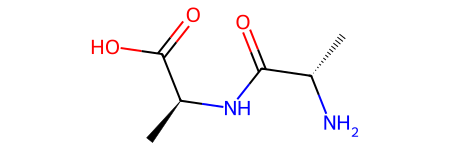

In [61]:
mol_h = Chem.MolFromHELM("PEPTIDE1{A.A}$$$$")
mol_h

In [15]:
mol_a1 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
print_atoms_and_labels(mol_a1)

C, MapNum: 0
C, MapNum: 0
N, MapNum: 0
*, MapNum: 0, label: _R1
C, MapNum: 0
*, MapNum: 0, label: _R2
O, MapNum: 0


In [80]:
#n_term -> c_term
def combine_monomers(m1: Mol, m2: Mol):
    for a in m1.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith("_R2"):
            a.SetAtomMapNum(1)
    for a in m2.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith("_R1"):
            a.SetAtomMapNum(1)
    return Chem.molzip(m1, m2)

In [64]:
def close_cap(mol: Mol, cap: Mol, r_num: int):
    r_str = "_R" + str(r_num)
    for a in mol.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith(r_str):
            a.SetAtomMapNum(1)
    for a in cap.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith(r_str):
            a.SetAtomMapNum(1)
    return Chem.molzip(mol, cap)

In [101]:
import re

def combine_monomers(m1: Mol, m1_r_num: int, m2: Mol, m2_r_num: int) -> Mol:
    m1_r_str = "_R" + str(m1_r_num)
    m2_r_str = "_R" + str(m2_r_num)
    for a in m1.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith(m1_r_str):
            a.SetAtomMapNum(1)
    for a in m2.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith(m2_r_str):
            a.SetAtomMapNum(1)
    return Chem.molzip(m1, m2)

def combine_backbone_monomers(m1: Mol, m2: Mol) -> Mol:
    return combine_monomers(m1, 2, m2, 1)

def close_r(mol: Mol, cap: Mol):
    for a in cap.GetAtoms():
        if a.HasProp("atomLabel"):
            r_str = a.GetProp("atomLabel")
            r_num = int(re.search(r'\d+$', r_str).group())
    return combine_monomers(mol, r_num, cap, r_num)


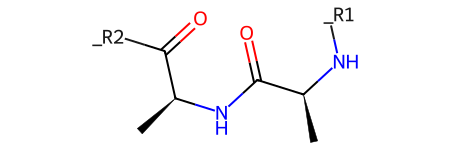

In [105]:
mol_a1 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
mol_a2 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
mol_aa = combine_backbone_monomers(mol_a1, mol_a2)
mol_aa

In [103]:
print_atoms_and_labels(mol_aa)

C, MapNum: 0
C, MapNum: 0
N, MapNum: 0
*, MapNum: 0, label: _R1
C, MapNum: 0
O, MapNum: 0
C, MapNum: 0
C, MapNum: 0
N, MapNum: 0
C, MapNum: 0
*, MapNum: 0, label: _R2
O, MapNum: 0


[03:03:52] WARNING: not removing hydrogen atom with dummy atom neighbors


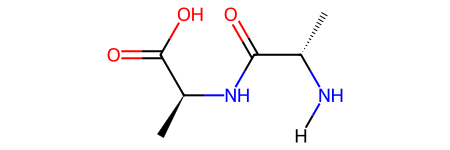

In [106]:
r1_mol = Chem.MolFromSmiles("[*][H] |$_R1;$|")
r2_mol = Chem.MolFromSmiles("O[*] |$;_R2$|")
mol_aa = close_r(mol_aa, r1_mol)
mol_aa = close_r(mol_aa, r2_mol)
mol_aa

In [107]:
is_same_molecule(mol_aa, mol_h)

True